# 1. Sentimentos com Spacy - Esaú e Jacó

In [21]:
import spacy
import pt_core_news_sm
import pandas as pd
import string
import random
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 2. Pré Processamento

In [2]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS
stop_words.add('o')

In [3]:
pln = spacy.load('pt_core_news_sm')

In [4]:
def preprocessamento(texto):
    texto = texto.lower()
    documento = pln(texto)    
    lista = []
    for token in documento:
        lista.append(token.lemma_)        
    lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in string.punctuation ]
    lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])    
    return lista

# 3. Carregando o modelo

In [5]:
modelo_carregado = spacy.load('modelo')
modelo_carregado

# 4. Importando o Conjunto de Dados

In [6]:
df_esau = pd.read_excel('./data/EsaueJaco_Revisado.xlsx',
                 error_bad_lines=False,
                  usecols = ['ID', 'Personagem','Texto', 'Tipo', 'TamanhoFrase'])

df_esau.shape

(4824, 5)

In [7]:
df_esau.head()

,ID,Personagem,Texto,Tipo,TamanhoFrase
0,1,Narrador,Era a primeira vez que as duas iam ao Morro d...,Narração,56
1,2,Narrador,Começaram de subir pelo lado da Rua do Carmo.,Narração,46
2,3,Narrador,Muita gente há no Rio de Janeiro que nunca lá...,Narração,121
3,4,Narrador,Nem todos podem dizer que conhecem uma cidade...,Narração,55
4,5,Narrador,"Um velho inglês, que aliás andara terras e te...",Narração,182


In [8]:
df_esau.isnull().sum()

ID              0
Personagem      0
Texto           0
Tipo            0
TamanhoFrase    0
dtype: int64

# 5. Pré-Processamento

In [9]:
df_esau['Texto_novo'] = df_esau['Texto'].apply(preprocessamento)

In [10]:
df_esau.head()

,ID,Personagem,Texto,Tipo,TamanhoFrase,Texto_novo
0,1,Narrador,Era a primeira vez que as duas iam ao Morro d...,Narração,56,morrer castelo
1,2,Narrador,Começaram de subir pelo lado da Rua do Carmo.,Narração,46,começar subir pelar ruir carmo
2,3,Narrador,Muita gente há no Rio de Janeiro que nunca lá...,Narração,121,gente haver rir janeiro haver morrer nascer ...
3,4,Narrador,Nem todos podem dizer que conhecem uma cidade...,Narração,55,conhecer umar cidade inteiro
4,5,Narrador,"Um velho inglês, que aliás andara terras e te...",Narração,182,velho inglês aliás andar terra e terra confi...


# 6. Aplicando o Modelo no Conjunto de Dados

In [11]:
previsoes = []
for texto in df_esau['Texto_novo']:    
    previsao = modelo_carregado(texto)
    previsoes.append(previsao.cats)

In [12]:
previsoes_final = []
for previsao in previsoes:
    if previsao['ALEGRIA']>previsao['MEDO'] and previsao['ALEGRIA']>previsao['RAIVA'] and previsao['ALEGRIA']>previsao['TRISTEZA']:
        previsoes_final.append('alegria')
    elif previsao['TRISTEZA']>previsao['MEDO'] and previsao['TRISTEZA']>previsao['RAIVA'] and previsao['TRISTEZA']>previsao['ALEGRIA']:
        previsoes_final.append('tristeza')
    elif previsao['MEDO']>previsao['TRISTEZA'] and previsao['MEDO']>previsao['RAIVA'] and previsao['MEDO']>previsao['ALEGRIA']:
        previsoes_final.append('medo')
    elif previsao['RAIVA']>previsao['TRISTEZA']  and previsao['RAIVA']>previsao['ALEGRIA']  and previsao['RAIVA']>previsao['MEDO']:
        previsoes_final.append('raiva')
    else:
        previsoes_final.append('sem rótulo')

previsoes_final = np.array(previsoes_final)
    

In [13]:
df_esau['Emoção'] = previsoes_final

In [14]:
df_esau.head()

,ID,Personagem,Texto,Tipo,TamanhoFrase,Texto_novo,Emoção
0,1,Narrador,Era a primeira vez que as duas iam ao Morro d...,Narração,56,morrer castelo,raiva
1,2,Narrador,Começaram de subir pelo lado da Rua do Carmo.,Narração,46,começar subir pelar ruir carmo,raiva
2,3,Narrador,Muita gente há no Rio de Janeiro que nunca lá...,Narração,121,gente haver rir janeiro haver morrer nascer ...,raiva
3,4,Narrador,Nem todos podem dizer que conhecem uma cidade...,Narração,55,conhecer umar cidade inteiro,alegria
4,5,Narrador,"Um velho inglês, que aliás andara terras e te...",Narração,182,velho inglês aliás andar terra e terra confi...,raiva


# 7. Resultados

Text(0.5, 1.0, 'Falas de Paulo - Esaú e Jacó')

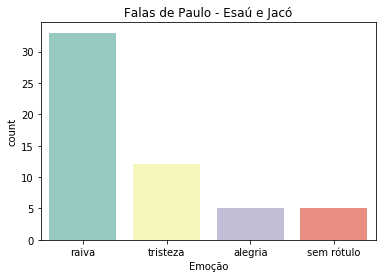

In [25]:
df_Paulo = df_esau[df_esau.Personagem=='Paulo']
categorias= ["raiva", "tristeza","alegria", "sem rótulo"]
sns.countplot(df_Paulo['Emoção'], label = 'Contagem', palette="Set3", order = categorias)
plt.title("Falas de Paulo - Esaú e Jacó")

Text(0.5, 1.0, 'Falas de Pedro - Esaú e Jacó')

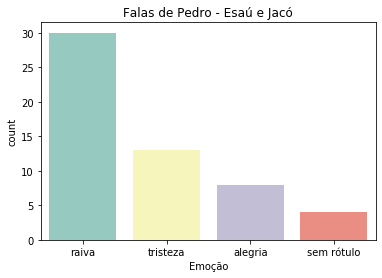

In [24]:
df_Pedro = df_esau[df_esau.Personagem=='Pedro']
categorias= ["raiva", "tristeza","alegria", "sem rótulo"]
sns.countplot(df_Pedro['Emoção'], label = 'Contagem', palette="Set3", order = categorias)
plt.title("Falas de Pedro - Esaú e Jacó")

Text(0.5, 1.0, 'Falas de Flora - Esaú e Jacó')

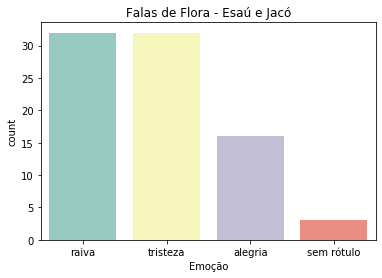

In [26]:
df_Flora = df_esau[df_esau.Personagem=='Flora']
categorias= ["raiva", "tristeza","alegria", "sem rótulo"]
sns.countplot(df_Flora['Emoção'], label = 'Contagem', palette="Set3", order = categorias)
plt.title("Falas de Flora - Esaú e Jacó")

Text(0.5, 1.0, 'Falas de Natividade - Esaú e Jacó')

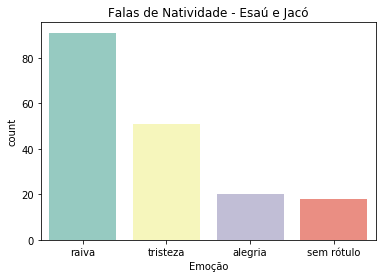

In [28]:
df_Natividade = df_esau[df_esau.Personagem=='Natividade']
categorias= ["raiva", "tristeza","alegria", "sem rótulo"]
sns.countplot(df_Natividade['Emoção'], label = 'Contagem', palette="Set3", order = categorias)
plt.title("Falas de Natividade - Esaú e Jacó")

Text(0.5, 1.0, 'Falas - Esaú e Jacó')

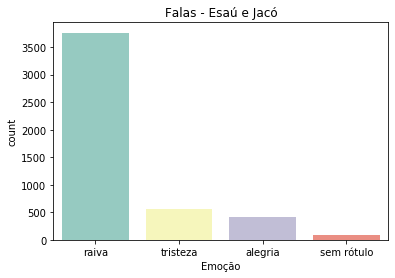

In [29]:
categorias= ["raiva", "tristeza","alegria", "sem rótulo"]
sns.countplot(df_esau['Emoção'], label = 'Contagem', palette="Set3", order = categorias)
plt.title("Falas - Esaú e Jacó")